In [39]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

In [40]:
diabetes = pd.read_csv('./data/diabetes.csv')
diabetes.shape

(768, 9)

In [41]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Profileing Report

In [42]:
pandas_profiling.ProfileReport(diabetes)

correlations [phi_k]:  50%|█████     | 3/6 [00:00<00:00,  5.78it/s]


AttributeError: 'LokyProcess' object has no attribute 'env'

# Univariate Statistics

In [4]:
df = diabetes

## Variable Types

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
preg_proportion = np.array(df['Pregnancies'].value_counts())
preg_month = np.array(df['Pregnancies'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)

preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg.head(10)

NameError: name 'np' is not defined

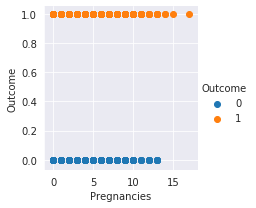

In [15]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="Outcome", )\
    .map(plt.scatter, "Pregnancies", "Outcome")\
    .add_legend()
plt.show()

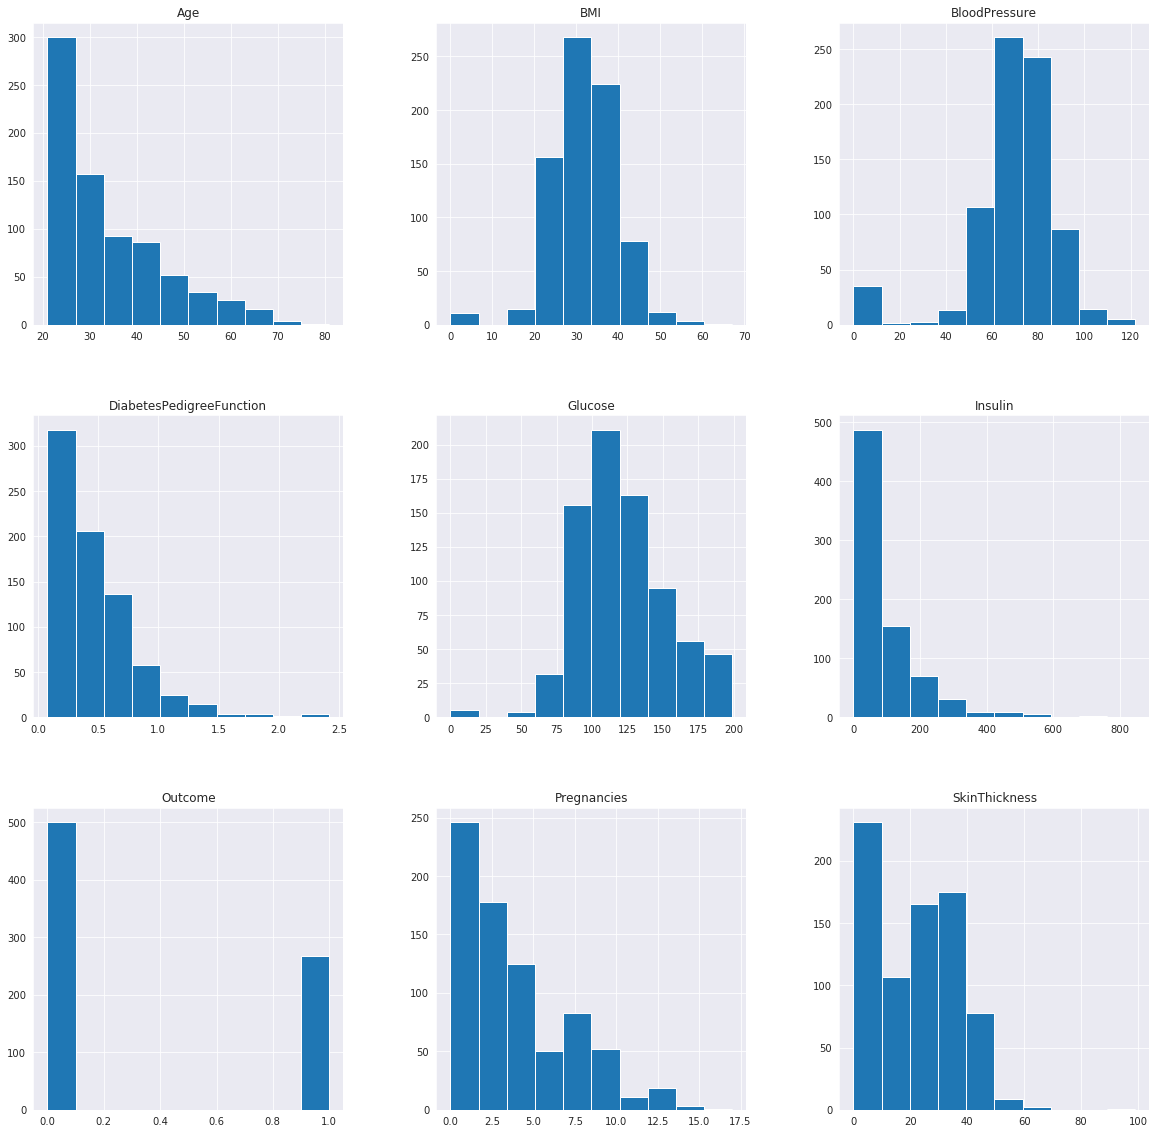

In [17]:
diabetes.hist(figsize=(20,20));

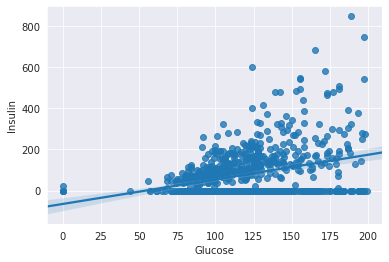

In [20]:
sns.regplot(x=diabetes['Glucose'], y=diabetes['Insulin']);

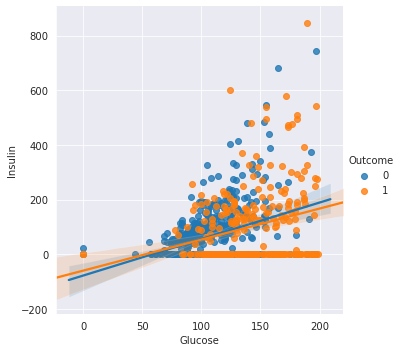

In [22]:
sns.lmplot(x="Glucose", y="Insulin", hue="Outcome", data=diabetes);

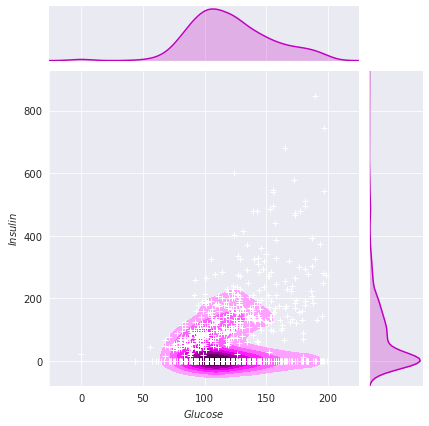

In [23]:
g = sns.jointplot(x="Glucose", y="Insulin", data=diabetes, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Glucose$", "$Insulin$");

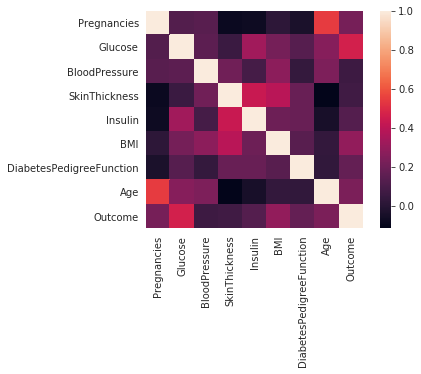

In [27]:
sns.heatmap(diabetes.corr(),square=True);

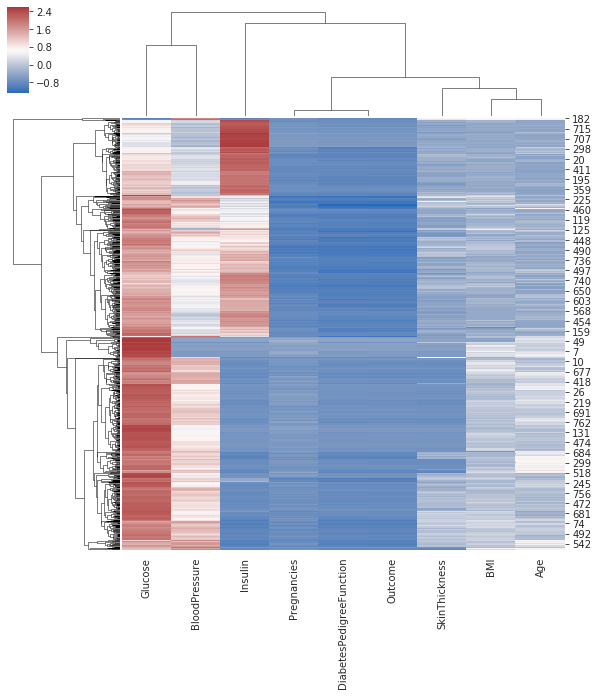

In [36]:
sns.clustermap(diabetes, z_score=0, cmap="vlag");